# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)

df.head()


,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

### Part 2: Define Your ML Problem

1. **Dataset Chosen:**  
   I chose the World Happiness Report dataset (WHR2018Chapter2OnlineData.csv) for this machine learning project.

2. **What am I predicting? What is the label?**  
   I am predicting whether a country’s current Life Ladder score falls into the high category (at or above the global median) or low category (below the median). The binary label high_happiness is defined as 1 if Life Ladder is at least the global median, and 0 otherwise.

3. **Is this a supervised or unsupervised learning problem? What type of problem is it?**  
   This is a supervised learning problem because I train the model on labeled data. It is a binary classification task, since there are two possible outcomes: high vs. low happiness.

4. **What are the features?**  
   I will use the following numerical predictors:  
   - Log GDP per capita  
   - Social support  
   - Healthy life expectancy at birth  
   - Freedom to make life choices  
   - Generosity  
   - Perceptions of corruption  
   - Positive affect  
   - Negative affect  
   - Confidence in national government  
   - Democratic Quality  
   - Delivery Quality  
   - GINI index (World Bank estimate)  
   - GINI index (World Bank estimate), average 2000–15  
   - gini of household income reported in Gallup, by wp5-year  
   I will exclude country, year, and the original Life Ladder from the feature set to avoid leakage.

5. **Why is this an important problem?**  
   Distinguishing between high- and low-happiness countries offers clear, actionable insight into global well-being. Policymakers, NGOs, and researchers can use this model to identify which nations may need targeted interventions, allocate resources more effectively, and track the impact of socioeconomic and political factors on population happiness. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE

print(df.dtypes)
display(df.describe())

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


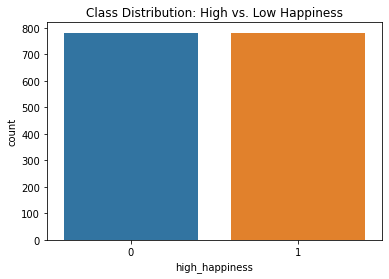

In [4]:
#Sort and reset index
df = df.sort_values(by=["country", "year"]).reset_index(drop=True)

#Create new label: high_happiness = 1 if current Life Ladder ≥ median, else 0
median_score = df["Life Ladder"].median()
df["high_happiness"] = (df["Life Ladder"] >= median_score).astype(int)

#Visualize class balance
sns.countplot(x="high_happiness", data=df)
plt.title("Class Distribution: High vs. Low Happiness")
plt.show()


In [5]:
#Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing[missing > 0])

Missing Values:
 GINI index (World Bank estimate)                            979
gini of household income reported in Gallup, by wp5-year    357
GINI index (World Bank estimate), average 2000-15           176
Delivery Quality                                            171
Democratic Quality                                          171
Confidence in national government                           161
Perceptions of corruption                                    90
Generosity                                                   80
Freedom to make life choices                                 29
Log GDP per capita                                           27
Positive affect                                              18
Social support                                               13
Negative affect                                              12
Healthy life expectancy at birth                              9
dtype: int64


In [6]:
#Drop non-predictive or highly sparse columns
df_cleaned = df.drop(columns=[
    "country", "year", "Life Ladder",
    "GINI index (World Bank estimate)",
    "GINI index (World Bank estimate), average 2000-15",
    "gini of household income reported in Gallup, by wp5-year"
])

#Drop any rows still containing NaNs
df_cleaned = df_cleaned.dropna()
print("Shape of final dataset:", df_cleaned.shape)

Shape of final dataset: (1181, 14)


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

### Part 4: Define Your Project Plan

New Feature List:  
I will use the numerical predictors:  
- Log GDP per capita  
- Social support  
- Healthy life expectancy at birth  
- Freedom to make life choices  
- Generosity  
- Perceptions of corruption  
- Positive affect  
- Negative affect  
- Confidence in national government  
- Democratic Quality  
- Delivery Quality  
- GINI indexes  

I removed country, year, and the original Life Ladder column to avoid leakage.

Data Preparation:  
- Sorted by country and year for consistency.  
- Created a binary label high_happiness = 1 if Life Ladder is at or above the global median, otherwise 0.  
- Dropped unused columns and any rows with missing values.  
- Scaled all features with StandardScaler.

Models:  
I will compare Logistic Regression and Random Forest, both of which handle binary classification and have been covered in the course.

Training and Evaluation Plan:  
- Split data 80/20 with stratification on the target.  
- Train each model on the training split.  
- Evaluate on the test split using accuracy, precision, recall, F1-score, and the confusion matrix.  


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [7]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [8]:
# YOUR CODE HERE
# Features and labe
X = df_cleaned.drop(columns=["high_happiness"])
y = df_cleaned["high_happiness"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



In [9]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Initialize models (only Logistic Regression and Random Forest)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [10]:
# Train, predict, and print metrics
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(name)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred), "\n")

Logistic Regression
Accuracy: 0.9746835443037974
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       121
           1       0.97      0.98      0.97       116

    accuracy                           0.97       237
   macro avg       0.97      0.97      0.97       237
weighted avg       0.97      0.97      0.97       237

Confusion Matrix:
[[117   4]
 [  2 114]] 

Random Forest
Accuracy: 0.9240506329113924
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       121
           1       0.92      0.93      0.92       116

    accuracy                           0.92       237
   macro avg       0.92      0.92      0.92       237
weighted avg       0.92      0.92      0.92       237

Confusion Matrix:
[[111  10]
 [  8 108]] 

